# Project on Bagging and Boosting ensemble model:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/talking_data.csv')
data.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


In [ ]:
data.tail()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
99995,124883,11,1,19,122,2017-11-09 13:25:41,NaN,0
99996,85150,9,1,13,244,2017-11-07 11:25:43,NaN,0
99997,18839,3,1,13,19,2017-11-08 11:38:42,NaN,0
99998,114276,15,1,12,245,2017-11-08 17:55:21,NaN,0
99999,119349,14,1,15,401,2017-11-07 14:32:27,NaN,0


In [ ]:
data.shape

(100000, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ip               100000 non-null  int64 
 1   app              100000 non-null  int64 
 2   device           100000 non-null  int64 
 3   os               100000 non-null  int64 
 4   channel          100000 non-null  int64 
 5   click_time       100000 non-null  object
 6   attributed_time  227 non-null     object
 7   is_attributed    100000 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 6.1+ MB


In [ ]:
data.describe()

,ip,app,device,os,channel,is_attributed
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,91255.879670,12.04788,21.771250,22.818280,268.832460,0.002270
std,69835.553661,14.94150,259.667767,55.943136,129.724248,0.047591
min,9.000000,1.00000,0.000000,0.000000,3.000000,0.000000
25%,40552.000000,3.00000,1.000000,13.000000,145.000000,0.000000
50%,79827.000000,12.00000,1.000000,18.000000,258.000000,0.000000
75%,118252.000000,15.00000,1.000000,19.000000,379.000000,0.000000
max,364757.000000,551.00000,3867.000000,866.000000,498.000000,1.000000


**1. Explore the dataset for anomalies and missing values and take corrective actions if necessary.**


In [ ]:
miss_val=data.isna().sum()
miss_val

ip                     0
app                    0
device                 0
os                     0
channel                0
click_time             0
attributed_time    99773
is_attributed          0
dtype: int64

only attributed_time has missing values . that tells that out of 100000 samples only 227 samples actually downloaded the app and rest of the cases are related to fraud clicks

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'app download')

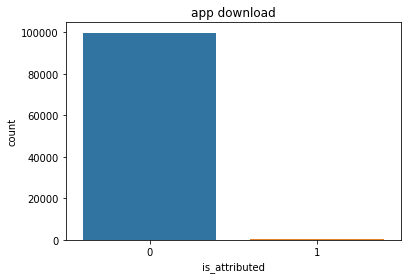

In [ ]:
sns.countplot('is_attributed',data = data)
plt.title("app download")

we can seee that data is highly unbalanced 

**2. Which column has maximum number of unique values present among all the available columns**


In [ ]:
len(data.ip.unique())

34857

In [ ]:
len(data.app.unique())

161

In [ ]:
len(data.device.unique())

100

In [ ]:
len(data.os.unique())

130

In [ ]:
len(data.channel.unique())

161

In [ ]:
len(data.click_time.unique())

80350

In [ ]:
len(data.attributed_time.unique())

228

In [ ]:
len(data.is_attributed.unique())

2

from above code ip has the most unique values

In [ ]:
data['click_time']=pd.to_datetime(data['click_time'])
data['attributed_time']=pd.to_datetime(data["attributed_time"])
data.drop(['attributed_time'],axis=1)

,ip,app,device,os,channel,click_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,0
1,105560,25,1,17,259,2017-11-07 13:40:27,0
2,101424,12,1,19,212,2017-11-07 18:05:24,0
3,94584,13,1,13,477,2017-11-07 04:58:08,0
4,68413,12,1,1,178,2017-11-09 09:00:09,0
...,...,...,...,...,...,...,...
99995,124883,11,1,19,122,2017-11-09 13:25:41,0
99996,85150,9,1,13,244,2017-11-07 11:25:43,0
99997,18839,3,1,13,19,2017-11-08 11:38:42,0
99998,114276,15,1,12,245,2017-11-08 17:55:21,0


**3. Use an appropriate technique to get rid of all the apps that are very rare (say which comprise of less                than 20% clicks) and plot the rest..** 


**4. By using Pandas derive new features such as - 'day_of_week' , 'day_of_year' , 'month' , and 'hour' as                  float/int datatypes using the 'click_time' column . Add the newly derived columns in original dataset.**

In [ ]:
def timeFeatures(data):
    # Derive new features using the click_time column
    data['datetime'] = pd.to_datetime(data['click_time'])
    data['day_of_week'] = data['datetime'].dt.dayofweek
    data["day_of_year"] = data["datetime"].dt.dayofyear
    data["month"] = data["datetime"].dt.month
    data["hour"] = data["datetime"].dt.hour
    return data

In [ ]:
data = timeFeatures(data)
data.drop(['click_time', 'datetime'], axis=1, inplace=True)
data.head()

,ip,app,device,os,channel,attributed_time,is_attributed,day_of_week,day_of_year,month,hour
0,87540,12,1,13,497,NaT,0,1,311,11,9
1,105560,25,1,17,259,NaT,0,1,311,11,13
2,101424,12,1,19,212,NaT,0,1,311,11,18
3,94584,13,1,13,477,NaT,0,1,311,11,4
4,68413,12,1,1,178,NaT,0,3,313,11,9


In [ ]:
data.drop(['attributed_time'],axis=1)

,ip,app,device,os,channel,is_attributed,day_of_week,day_of_year,month,hour
0,87540,12,1,13,497,0,1,311,11,9
1,105560,25,1,17,259,0,1,311,11,13
2,101424,12,1,19,212,0,1,311,11,18
3,94584,13,1,13,477,0,1,311,11,4
4,68413,12,1,1,178,0,3,313,11,9
...,...,...,...,...,...,...,...,...,...,...
99995,124883,11,1,19,122,0,3,313,11,13
99996,85150,9,1,13,244,0,1,311,11,11
99997,18839,3,1,13,19,0,2,312,11,11
99998,114276,15,1,12,245,0,2,312,11,17


In [ ]:

from sklearn.model_selection import train_test_split


In [ ]:
X=df.drop(['is_attributed'],axis=1)
y=df[['is_attributed']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(80000, 10)
(80000, 1)
(20000, 10)
(20000, 1)


In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn import metrics

In [ ]:
data.dtypes

ip                          int64
app                         int64
device                      int64
os                          int64
channel                     int64
attributed_time    datetime64[ns]
is_attributed               int64
day_of_week                 int64
day_of_year                 int64
month                       int64
hour                        int64
dtype: object

In [ ]:
df=data.drop(['attributed_time'],axis=1)
df

,ip,app,device,os,channel,is_attributed,day_of_week,day_of_year,month,hour
0,87540,12,1,13,497,0,1,311,11,9
1,105560,25,1,17,259,0,1,311,11,13
2,101424,12,1,19,212,0,1,311,11,18
3,94584,13,1,13,477,0,1,311,11,4
4,68413,12,1,1,178,0,3,313,11,9
...,...,...,...,...,...,...,...,...,...,...
99995,124883,11,1,19,122,0,3,313,11,13
99996,85150,9,1,13,244,0,1,311,11,11
99997,18839,3,1,13,19,0,2,312,11,11
99998,114276,15,1,12,245,0,2,312,11,17


In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = model.predict_proba(X_test)
y_pred[:10]

array([[9.9947810e-01, 5.2191829e-04],
       [9.9820191e-01, 1.7981021e-03],
       [9.9960804e-01, 3.9195732e-04],
       [9.9970561e-01, 2.9441601e-04],
       [9.9984699e-01, 1.5298175e-04],
       [9.9968809e-01, 3.1193139e-04],
       [9.9952805e-01, 4.7195834e-04],
       [9.9956530e-01, 4.3469970e-04],
       [9.9920344e-01, 7.9653482e-04],
       [9.9988085e-01, 1.1915214e-04]], dtype=float32)

In [ ]:
roc = metrics.roc_auc_score(y_test, y_pred[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 94.88%
